In [65]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [66]:
df_environment = pd.read_csv("datasets/environment_mex.csv")
df_environment.columns

Index(['Country Name', 'Country ISO3', 'Year', 'Indicator Name',
       'Indicator Code', 'Value'],
      dtype='object')

In [67]:
# Country Name, Country ISO3 and Indicator Code are unnecessary columns
df_environment.drop(['Country Name', 'Country ISO3', 'Indicator Code'], axis=1, inplace=True)

# Also row 0 is not necessary
df_environment.drop([0], inplace=True)

df_environment.head(1)


,Year,Indicator Name,Value
1,2018,Agricultural land (% of land area),54.9864965662697


## I want to use the indicator name in different columns

In [68]:
pivot1 = pd.pivot_table(df_environment, index="Year", columns="Indicator Name", values="Value")
pivot1.head(1)

Indicator Name,Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)",Access to electricity (% of population),"Adjusted net savings, excluding particulate emission damage (% of GNI)","Adjusted net savings, excluding particulate emission damage (current US$)","Adjusted net savings, including particulate emission damage (% of GNI)","Adjusted net savings, including particulate emission damage (current US$)",Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: carbon dioxide damage (current US$),...,Terrestrial protected areas (% of total land area),Total fisheries production (metric tons),Total greenhouse gas emissions (% change from 1990),Total greenhouse gas emissions (kt of CO2 equivalent),Total natural resources rents (% of GDP),Urban land area (sq. km),Urban land area where elevation is below 5 meters (% of total land area),Urban land area where elevation is below 5 meters (sq. km),Urban population living in areas where elevation is below 5 meters (% of total population),"Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)"
Year,,,,,,,,,,,,,,,,,,,,,
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,196513.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Now it's easier to check columns.
Considering that there are 129 columns, I think it's a good idea to select the ones that I want to analyze and create a new dataframe with them.

In [69]:
# Check the name of the columns
pivot1.columns

Index(['Access to clean fuels and technologies for cooking (% of population)',
       'Access to clean fuels and technologies for cooking, rural (% of rural population)',
       'Access to clean fuels and technologies for cooking, urban (% of urban population)',
       'Access to electricity (% of population)',
       'Adjusted net savings, excluding particulate emission damage (% of GNI)',
       'Adjusted net savings, excluding particulate emission damage (current US$)',
       'Adjusted net savings, including particulate emission damage (% of GNI)',
       'Adjusted net savings, including particulate emission damage (current US$)',
       'Adjusted savings: carbon dioxide damage (% of GNI)',
       'Adjusted savings: carbon dioxide damage (current US$)',
       ...
       'Terrestrial protected areas (% of total land area)',
       'Total fisheries production (metric tons)',
       'Total greenhouse gas emissions (% change from 1990)',
       'Total greenhouse gas emissions (kt of C

# Total greenhouse gas emissions (% change from 1990)


In [70]:
hist_ = pivot1['Total greenhouse gas emissions (% change from 1990)']
hist_.dropna()
pivot1['Total greenhouse gas emissions (% change from 1990)'].describe()

count    22.000000
mean     18.663572
std      12.637721
min       0.100095
25%       8.142528
50%      15.782376
75%      30.318425
max      40.103562
Name: Total greenhouse gas emissions (% change from 1990), dtype: float64

In [71]:
hist_.dropna()

Year
1991     2.230696
1992     0.100095
1993     1.612875
1994     5.276677
1995     4.413669
1996     7.822185
1997     9.103557
1998    40.103562
1999    12.080582
2000    16.662619
2001    10.889295
2002    14.879791
2003    21.761505
2004    14.902133
2005    29.779924
2006    29.947677
2007    30.793752
2008    30.358521
2009    31.308052
2010    30.198139
2011    32.117767
2012    34.255506
Name: Total greenhouse gas emissions (% change from 1990), dtype: float64

<AxesSubplot:xlabel='Year'>

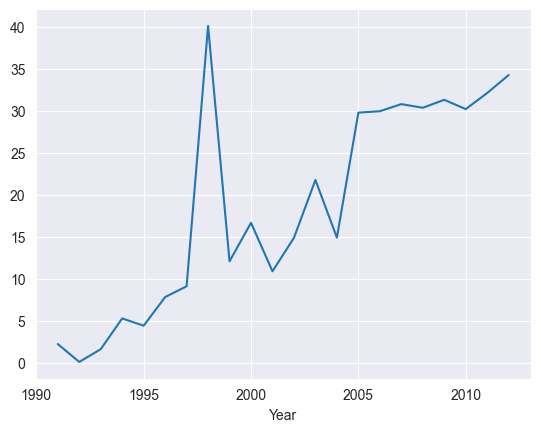

In [72]:
hist_.plot.line()

**What happened between 1995 and 2000?**
I'll try to understand how it was calculated.

In [73]:
# Filter all CO2 and greenhouse gas related columns
df_co2 = pivot1.filter(like="CO2", axis=1)
df_greenhouse = pivot1.filter(like="greenhouse", axis=1)
df_full = pd.concat([df_co2, df_greenhouse], axis=1)

# Remove duplicated columns
df_full = df_full.loc[:,~df_full.columns.duplicated()].copy()
df_full.columns

Index(['Agricultural methane emissions (thousand metric tons of CO2 equivalent)',
       'Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
       'CO2 emissions (kg per 2015 US$ of GDP)',
       'CO2 emissions (kg per 2017 PPP $ of GDP)',
       'CO2 emissions (kg per PPP $ of GDP)', 'CO2 emissions (kt)',
       'CO2 emissions (metric tons per capita)',
       'CO2 emissions from gaseous fuel consumption (% of total)',
       'CO2 emissions from gaseous fuel consumption (kt)',
       'CO2 emissions from liquid fuel consumption (% of total)',
       'CO2 emissions from liquid fuel consumption (kt)',
       'CO2 emissions from solid fuel consumption (% of total)',
       'CO2 emissions from solid fuel consumption (kt)',
       'CO2 intensity (kg per kg of oil equivalent energy use)',
       'GHG net emissions/removals by LUCF (Mt of CO2 equivalent)',
       'HFC gas emissions (thousand metric tons of CO2 equivalent)',
       'Methane emissions (kt of CO2 eq

In [74]:
# Check for number of NaN values per category.
df_full.isnull().sum()


Indicator Name
Agricultural methane emissions (thousand metric tons of CO2 equivalent)                      32
Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent)                32
CO2 emissions (kg per 2015 US$ of GDP)                                                       33
CO2 emissions (kg per 2017 PPP $ of GDP)                                                     32
CO2 emissions (kg per PPP $ of GDP)                                                          32
CO2 emissions (kt)                                                                           32
CO2 emissions (metric tons per capita)                                                       32
CO2 emissions from gaseous fuel consumption (% of total)                                      5
CO2 emissions from gaseous fuel consumption (kt)                                              5
CO2 emissions from liquid fuel consumption (% of total)                                       5
CO2 emissions from liquid

In [75]:
# Drop columns with more than 41 NaN values
df_full.dropna(thresh = len(df_full) - 41, axis = 1, inplace = True)
df_full.isnull().sum()

Indicator Name
Agricultural methane emissions (thousand metric tons of CO2 equivalent)                      32
Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent)                32
CO2 emissions (kg per 2015 US$ of GDP)                                                       33
CO2 emissions (kg per 2017 PPP $ of GDP)                                                     32
CO2 emissions (kg per PPP $ of GDP)                                                          32
CO2 emissions (kt)                                                                           32
CO2 emissions (metric tons per capita)                                                       32
CO2 emissions from gaseous fuel consumption (% of total)                                      5
CO2 emissions from gaseous fuel consumption (kt)                                              5
CO2 emissions from liquid fuel consumption (% of total)                                       5
CO2 emissions from liquid

In [79]:
total_co2 = df_full["Total greenhouse gas emissions (kt of CO2 equivalent)"].dropna()

total_co2 = pd.DataFrame(data=(((x - total_co2[0])/total_co2[0])*100 for x in df_full["Total greenhouse gas emissions (kt of CO2 equivalent)"]), index=df_full.index)
# Calculate the percentage of change from 1990.
#for x in total_co2:
#    print(((x - total_co2[0])/total_co2[0])*100)
total_co2[0].dropna()

Year
1990     0.000000
1991     4.667082
1992     5.396389
1993     9.707530
1994    16.326073
1995    11.233355
1996    16.009958
1997    21.712511
1998    27.920344
1999    25.209707
2000    31.982574
2001    32.121963
2002    34.185445
2003    40.126950
2004    43.029246
2005    48.627252
2006    53.829498
2007    56.930920
2008    57.951464
2009    55.586810
2010    60.027374
2011    65.020528
2012    67.298070
2013    63.902920
2014    61.645295
2015    66.036089
2016    67.766024
2017    67.168631
2018    62.850031
2019    62.755444
Name: 0, dtype: float64

<AxesSubplot:xlabel='Year'>

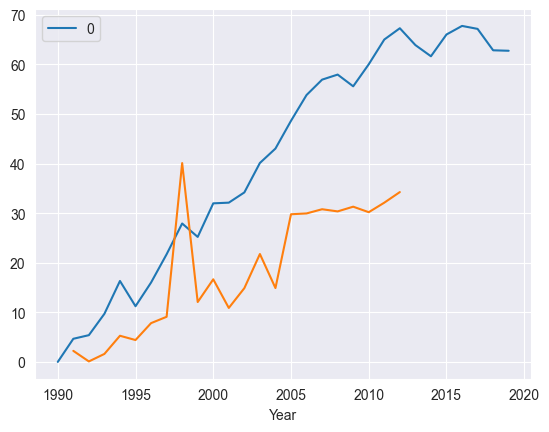

In [84]:
total_co2.plot.line()
hist_.plot.line()

There are some huge differences, and the calculation I made doesn't contain that huge peak at 1998. Was it an error from the original source?

<AxesSubplot:xlabel='Indicator Name', ylabel='Indicator Name'>

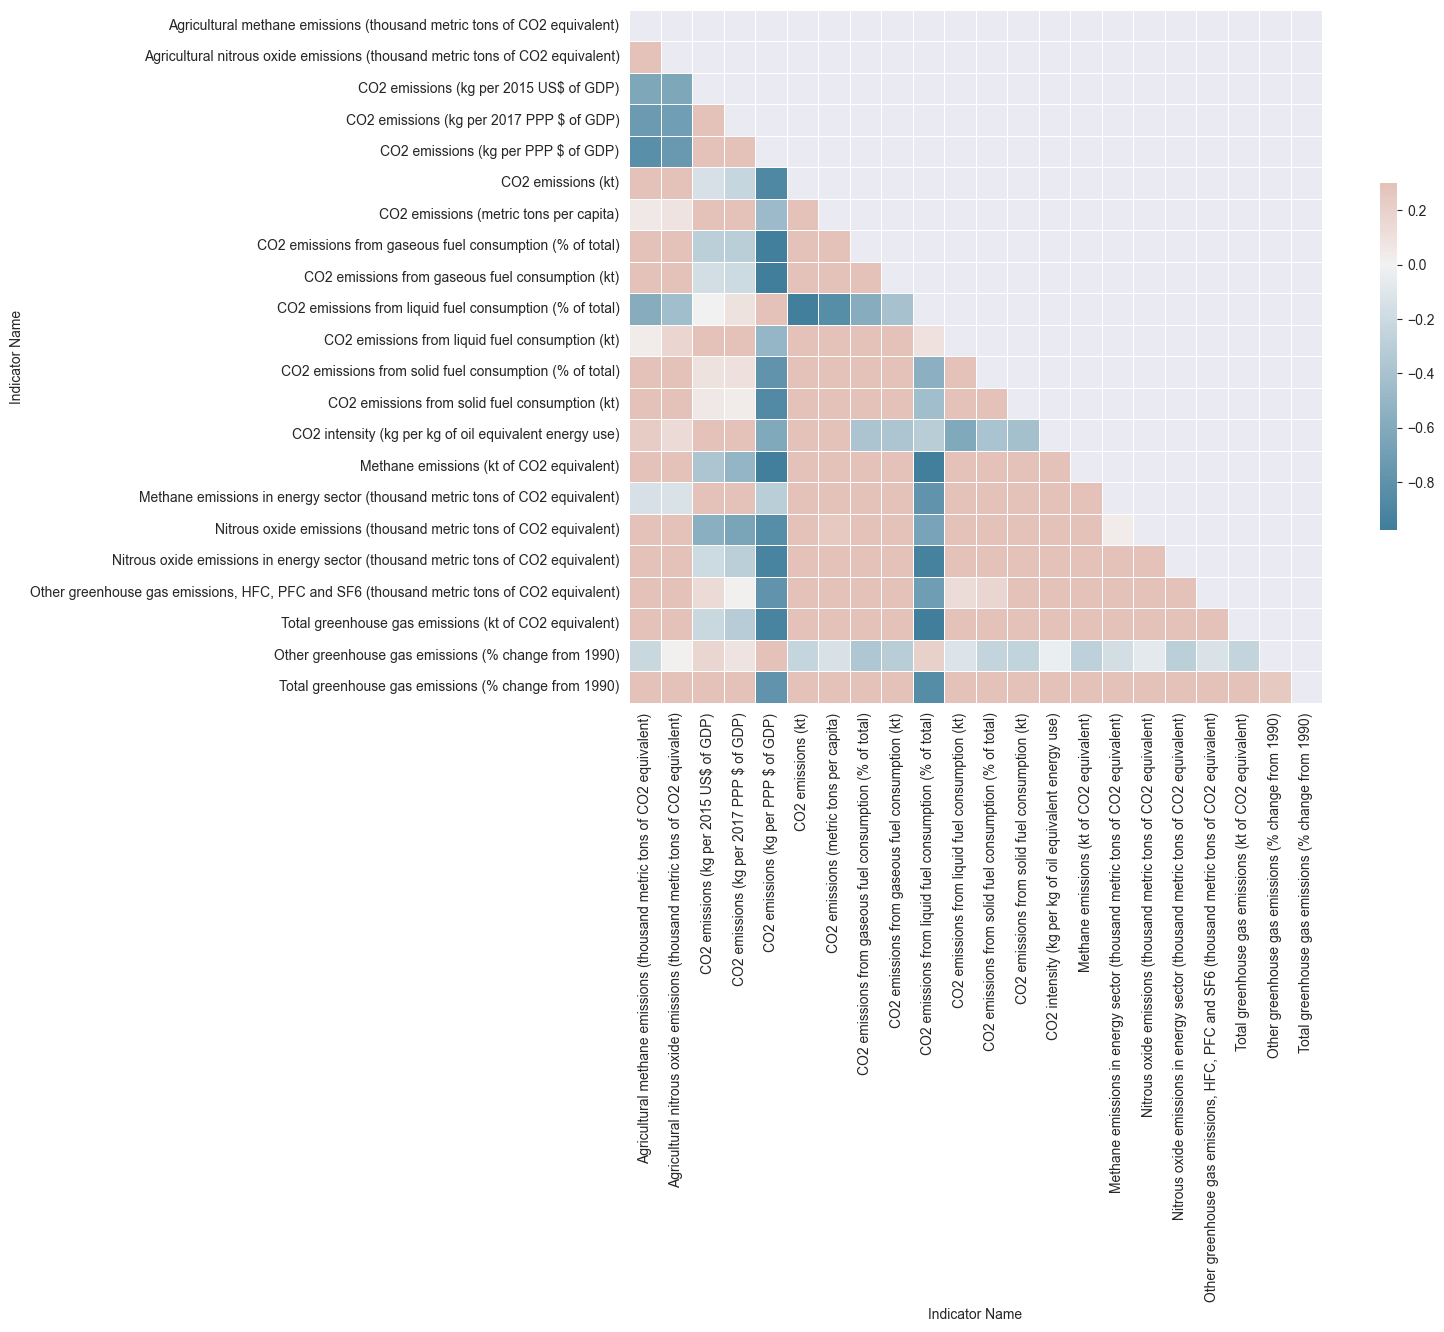

In [86]:
# Try with a diagonal correlation matrix

# Compute correlation matrix
corr = df_full.corr()

# Generate mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up matplotlib figure
f, ax = plt.subplots(figsize=(15, 9))

# generate custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw heatmap with mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Greenhouse gas emissions by sector in Mexico
million metric tonnes of carbon dioxide equivalents

First, I'll check for the most CO2 eq contaminant sectors in Mexico, so I can limit the investigation to the most contaminant ones and try to find a correlation within those sectors and the extreme percentage of change between 1995 and 2000

In [87]:
df_ghge = pd.read_csv("datasets/ghg-emissions-by-sector.csv")
df_ghge.columns


Index(['Entity', 'Code', 'Year', 'Agriculture', 'Land-use change and forestry',
       'Waste', 'Industry', 'Manufacturing and construction', 'Transport',
       'Electricity and heat', 'Buildings', 'Fugitive emissions',
       'Other fuel combustion', 'Aviation and shipping'],
      dtype='object')

In [88]:
# I can pivot this table to use Countries as columns and years as index
df_ghge_mexico = df_ghge.query("Entity == 'Mexico'")
df_ghge_mexico.drop(['Entity', 'Code'], axis=1, inplace=True)
df_ghge_mexico

/tmp/ipykernel_31993/315749359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ghge_mexico.drop(['Entity', 'Code'], axis=1, inplace=True)


,Year,Agriculture,Land-use change and forestry,Waste,Industry,Manufacturing and construction,Transport,Electricity and heat,Buildings,Fugitive emissions,Other fuel combustion,Aviation and shipping
3510,1990,8.878000e+07,2.454000e+07,8.020000e+06,1.326000e+07,5.355000e+07,8.612000e+07,9.451000e+07,2.325000e+07,2.910000e+07,5.160000e+06,5.330000e+06
3511,1991,8.706000e+07,2.454000e+07,8.690000e+06,1.367000e+07,5.228000e+07,9.216000e+07,1.069300e+08,2.428000e+07,3.009000e+07,5.340000e+06,5.550000e+06
3512,1992,8.640000e+07,2.454000e+07,9.350000e+06,1.389000e+07,5.196000e+07,9.247000e+07,1.079100e+08,2.622000e+07,2.983000e+07,5.390000e+06,6.140000e+06
3513,1993,8.789000e+07,2.454000e+07,1.521000e+07,1.490000e+07,5.025000e+07,9.461000e+07,1.145400e+08,2.671000e+07,3.120000e+07,5.420000e+06,7.230000e+06
3514,1994,8.774000e+07,2.454000e+07,1.583000e+07,1.614000e+07,5.111000e+07,1.004400e+08,1.308600e+08,2.796000e+07,3.215000e+07,5.110000e+06,9.650000e+06
3515,1995,8.600000e+07,2.454000e+07,1.645000e+07,1.383000e+07,4.953000e+07,9.217000e+07,1.223100e+08,2.797000e+07,3.337000e+07,5.260000e+06,9.490000e+06
3516,1996,8.493000e+07,2.400000e+07,1.700000e+07,1.707000e+07,5.510000e+07,9.455000e+07,1.277200e+08,2.773000e+07,3.629000e+07,5.680000e+06,9.360000e+06
3517,1997,8.551000e+07,2.424000e+07,1.695000e+07,1.801000e+07,5.521000e+07,9.868000e+07,1.419100e+08,2.736000e+07,3.929000e+07,6.060000e+06,9.810000e+06
3518,1998,8.743000e+07,3.266000e+07,1.692000e+07,1.855000e+07,5.662000e+07,1.013200e+08,1.592600e+08,2.843000e+07,3.936000e+07,6.040000e+06,1.120000e+07
3519,1999,8.531000e+07,2.777000e+07,1.774000e+07,1.996000e+07,5.208000e+07,1.041100e+08,1.532000e+08,2.613000e+07,3.784000e+07,6.660000e+06,1.203000e+07


In [89]:
# A global table from the last year in the table (2019)
row_2019 = df_ghge_mexico.filter(items=[3539], axis=0)
row_2019


,Year,Agriculture,Land-use change and forestry,Waste,Industry,Manufacturing and construction,Transport,Electricity and heat,Buildings,Fugitive emissions,Other fuel combustion,Aviation and shipping
3539,2019,9.854000e+07,1.697000e+07,4.760000e+07,4.281000e+07,5.653000e+07,1.517800e+08,1.866200e+08,2.244000e+07,3.799000e+07,9.570000e+06,1.504000e+07


In [90]:
row_2019 = pd.melt(row_2019)

row_2019

,variable,value
0,Year,2.019000e+03
1,Agriculture,9.854000e+07
2,Land-use change and forestry,1.697000e+07
3,Waste,4.760000e+07
4,Industry,4.281000e+07
5,Manufacturing and construction,5.653000e+07
6,Transport,1.517800e+08
7,Electricity and heat,1.866200e+08
8,Buildings,2.244000e+07
9,Fugitive emissions,3.799000e+07


<AxesSubplot:xlabel='Category'>

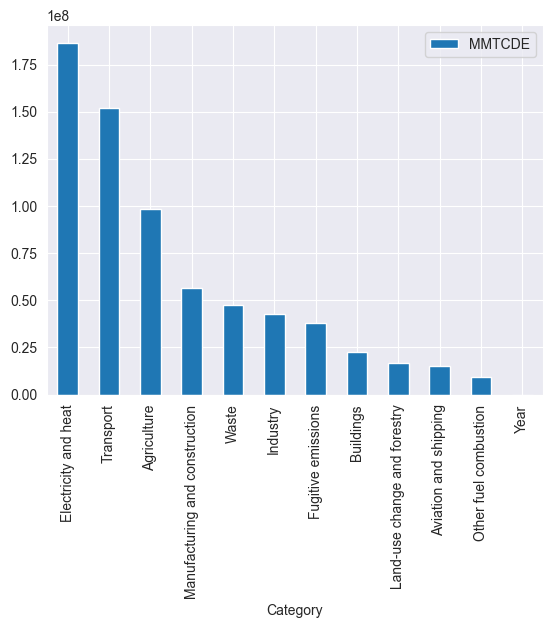

In [91]:
row_2019 = row_2019.rename(columns={"variable":"Category", "value":"MMTCDE"})
row_2019 = row_2019.sort_values(by=["MMTCDE"], ascending=False)
row_2019.plot.bar(x="Category", y="MMTCDE")

In [92]:
df_fossil = pd.read_csv("datasets/fossil-fuels-share-energy.csv")
df_fossil.columns

Index(['Entity', 'Code', 'Year', 'Fossil fuels (% equivalent primary energy)'], dtype='object')

In [93]:
df_fossil = df_fossil.query("Entity == 'Mexico'")
df_fossil.drop(['Entity', 'Code'], axis=1, inplace=True)
df_fossil.head(2)

,Year,Fossil fuels (% equivalent primary energy)
2917,1965,91.065277
2918,1966,90.366890


<AxesSubplot:xlabel='Year'>

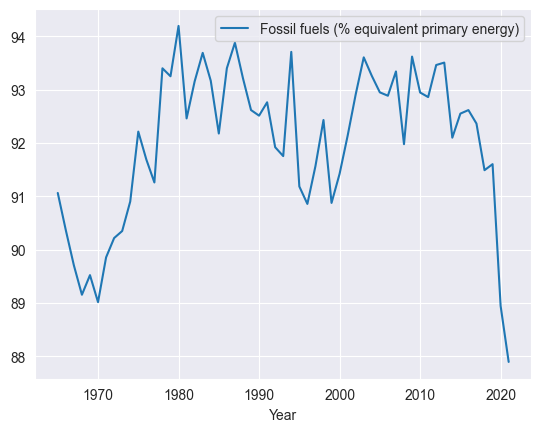

In [99]:
df_fossil.plot.line(x="Year", y="Fossil fuels (% equivalent primary energy)")
